In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
data = pd.read_csv("sentimentdata.csv")

# Display basic information about the dataset
print("Shape of the dataset:", data.shape)
print("Columns in the dataset:", data.columns)
print("Sample records from the dataset:")
data.head()



Shape of the dataset: (732, 15)
Columns in the dataset: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')
Sample records from the dataset:


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


<ipython-input-17-681882615564>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='viridis')


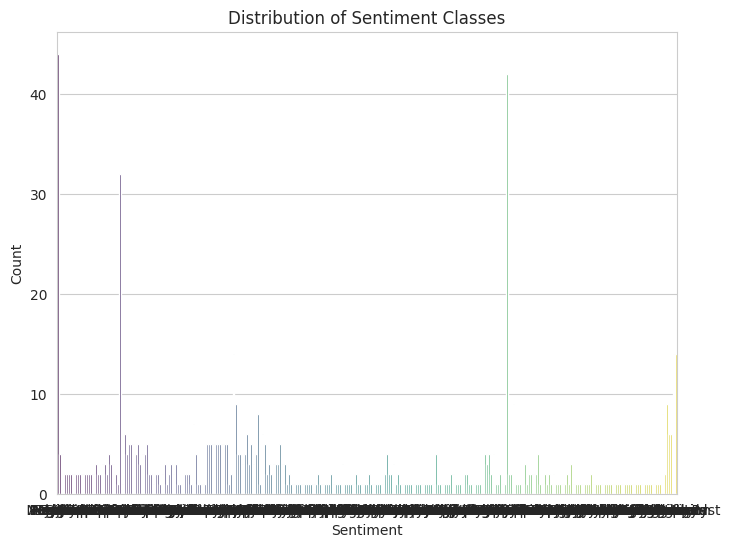

In [ ]:

# Data preprocessing (cleaning not shown for brevity)
# Tokenization, stopword removal, etc.

# Exploratory Data Analysis (EDA)
# Distribution of sentiment classes
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

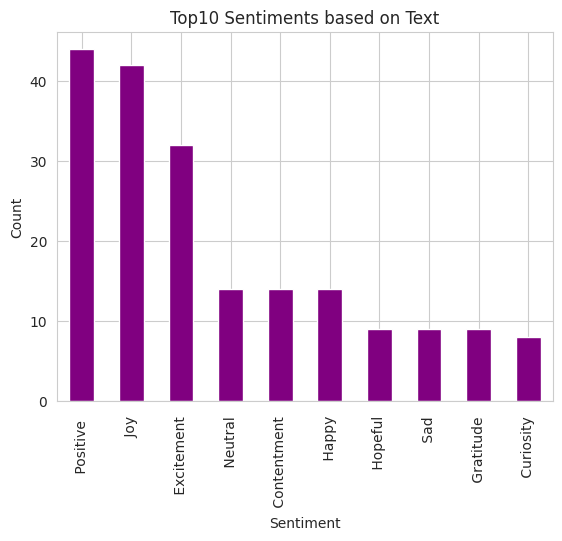

In [ ]:
data['Sentiment'].value_counts().nlargest(10).plot(kind='bar', color='purple')
plt.title('Top10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

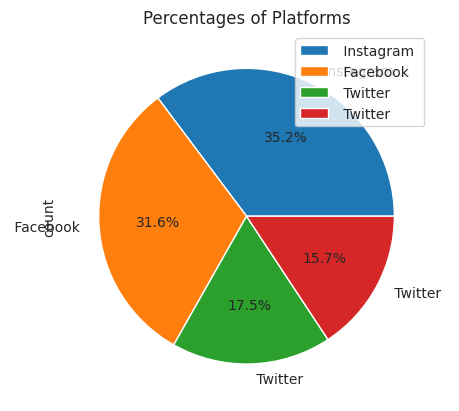

In [ ]:
data['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

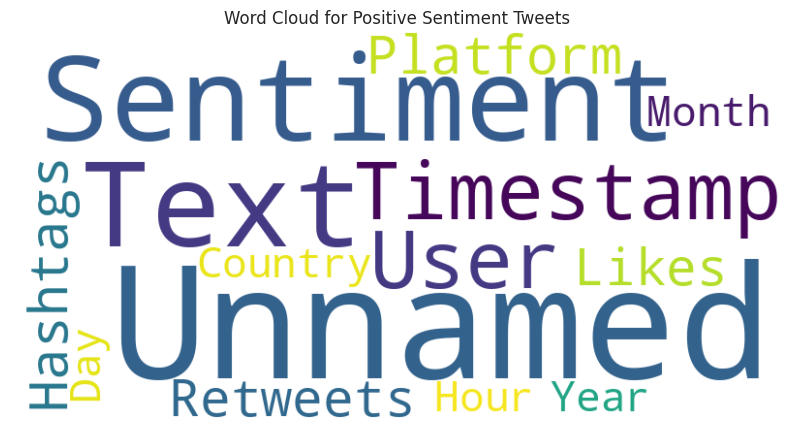

In [ ]:


# Word cloud for most common words in positive sentiment tweets
positive_tweets = data[data['Sentiment'] == 'Positive']
positive_text = ' '.join(positive_tweets)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment Tweets')
plt.axis('off')
plt.show()



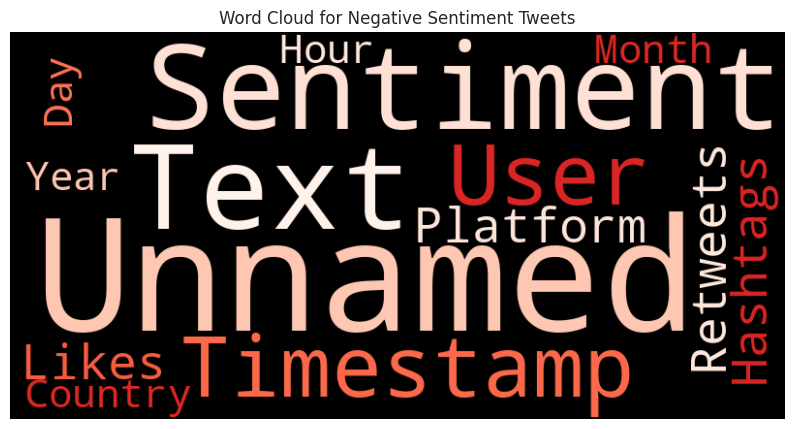

In [ ]:
# Word cloud for most common words in negative sentiment tweets
negative_tweets = data[data['Sentiment'] == 'Negative']
negative_text = ' '.join(negative_tweets)
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment Tweets')
plt.axis('off')
plt.show()



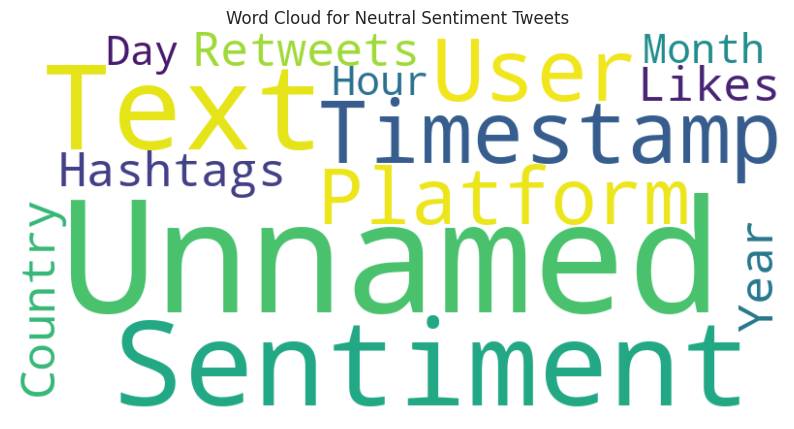

In [ ]:
# Word cloud for most common words in neutral sentiment tweets
neutral_tweets = data[data['Sentiment'] == 'Neutral']
neutral_text = ' '.join(neutral_tweets)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiment Tweets')
plt.axis('off')
plt.show()

<ipython-input-32-a4730917bc18>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette='viridis')


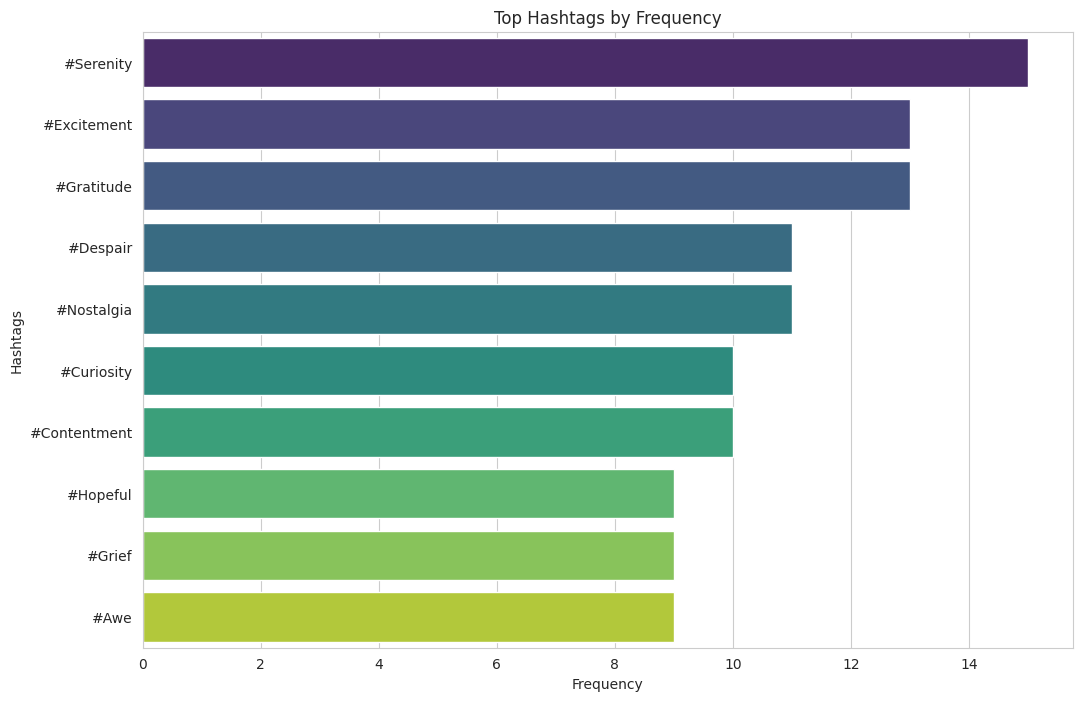

In [ ]:
# Top hashtags by sentiment
plt.figure(figsize=(12, 8))
top_hashtags = data['Hashtags'].str.split(expand=True).stack().value_counts().nlargest(10)
sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette='viridis')
plt.title('Top Hashtags by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Hashtags')
plt.show()

<ipython-input-33-8ce0ffea64b2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_platforms.values, y=top_platforms.index, palette='viridis')


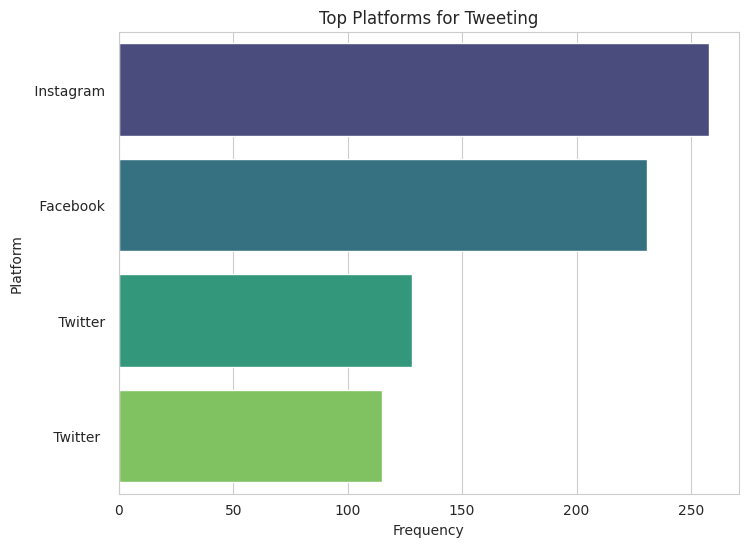

In [ ]:
# Top platforms used for tweeting
plt.figure(figsize=(8, 6))
top_platforms = data['Platform'].value_counts()
sns.barplot(x=top_platforms.values, y=top_platforms.index, palette='viridis')
plt.title('Top Platforms for Tweeting')
plt.xlabel('Frequency')
plt.ylabel('Platform')
plt.show()

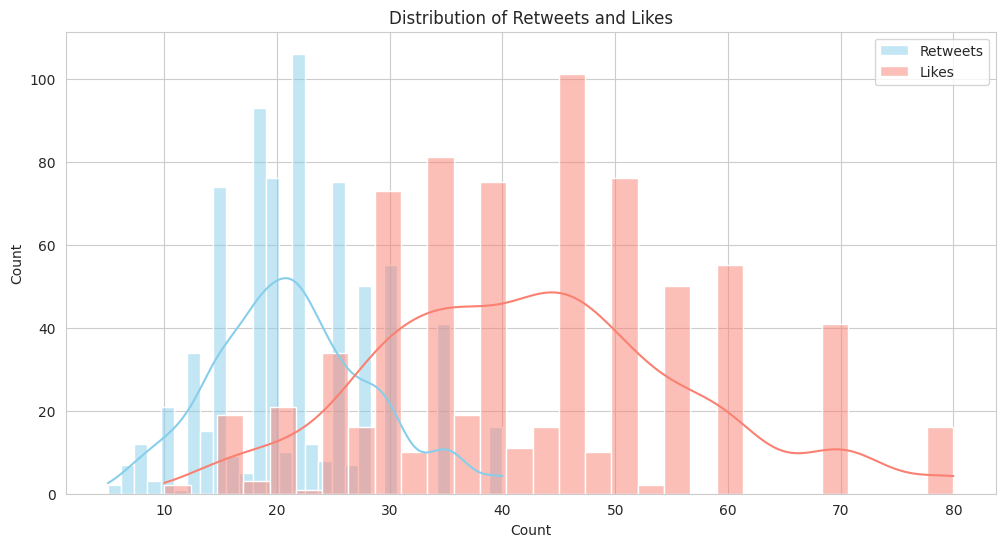

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Retweets', bins=30, kde=True, color='skyblue', label='Retweets')
sns.histplot(data=data, x='Likes', bins=30, kde=True, color='salmon', label='Likes')
plt.title('Distribution of Retweets and Likes')
plt.xlabel('Count')
plt.legend()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
topic_or_brand = "Apple"  # Example topic or brand

# Filter relevant data related to the specific topic or brand
filtered_data = data[data['Text'].str.contains(topic_or_brand, case=False)]

In [ ]:
# Display basic information about the filtered dataset
print("Shape of the filtered dataset:", filtered_data.shape)
print("Sample records from the filtered dataset:")
print(filtered_data.head())

Shape of the filtered dataset: (1, 15)
Sample records from the filtered dataset:
     Unnamed: 0.1  Unnamed: 0  \
556           557         561   

                                                  Text         Sentiment  \
556  Experiencing a series of losses in the basketb...   Renewed Effort    

               Timestamp                       User   Platform  \
556  2019-02-12 19:45:00   BasketballFanTeamLosses    Twitter    

                                  Hashtags  Retweets  Likes   Country  Year  \
556   #RenewedEffort #BasketballStruggles       22.0   45.0   Canada   2019   

     Month  Day  Hour  
556      2   12    19  


In [ ]:
# Topic Modeling using Latent Dirichlet Allocation (LDA)
# Use default values for max_df and min_df
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(filtered_data['Text'])

num_topics = 5  # Number of topics to identify
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tfidf)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx+1}: {' '.join(top_words)}")

Topic 1: the with losses determined effort experiencing frustration grapples in of
Topic 2: of turn determined effort experiencing frustration grapples in losses basketball
Topic 3: of turn determined effort experiencing frustration grapples in losses basketball
Topic 4: of turn determined effort experiencing frustration grapples in losses basketball
Topic 5: of turn determined effort experiencing frustration grapples in losses basketball


<ipython-input-41-85cdda4dfc6e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_labels, y=topic_distribution.sum(axis=0), palette='coolwarm')


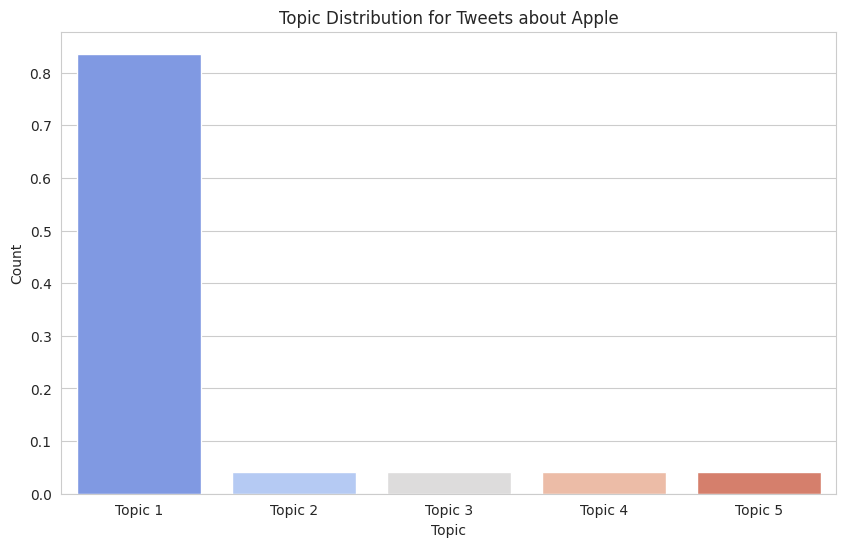

In [ ]:
# Visualize topic distribution
topic_distribution = lda.transform(tfidf)
topic_labels = [f"Topic {i+1}" for i in range(num_topics)]
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x=topic_labels, y=topic_distribution.sum(axis=0), palette='coolwarm')
plt.title('Topic Distribution for Tweets about {}'.format(topic_or_brand))
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()